In [2]:
import datetime
from resnet18 import ResNet18
from utils import *
setup_seed(6666)


# train_loader = load_data()
# iter_val_loader = load_data(train=False, n_items=512)
# epoch_val_loader = load_data(train=False)

loaders = load_data()  # (train_loader, val_loader, test_loader)

net = ResNet18().to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=8, min_lr=1e-4)

loss_list = []
train_err = []
val_err = []

# max_val_accuracy = 0
# PATH = f'./my-resnet-.pth'
start_time = datetime.datetime.now()
for epoch in range(32):
    acc = train_model(epoch, loaders[:2], (loss_list, train_err, val_err), (net, criterion, optimizer))
    scheduler.step(acc)
end_time = datetime.datetime.now()
# torch.save(model.state_dict(), PATH)
print('Training time:%d' % (end_time - start_time).seconds)
# test_acc = get_acc(net, loaders[2])
# print(f'Test accuracy: {test_acc}')

# draw_loss(loss_list)
# draw_acc(train_err, val_err)

# ILV, EFR = get_ILV_and_EFR(loss_list, train_err, val_err)
# print(*ILV, sep='\t')
# print(*EFR, sep='\t')

NameError: name 'val_set' is not defined

In [3]:
import datetime
from resnet18 import ResNet18
from new_utils import *
setup_seed(6666)


train_loader = load_data_new()
iter_val_loader = load_data_new(train=False, n_items=512)
epoch_val_loader, test_loader = load_data_new(train=False)

net = ResNet18().to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.1, momentum=0.9, weight_decay=0.0005)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=8, min_lr=1e-4)

loss_list = []
train_err = []
val_err = []

# max_val_accuracy = 0
# PATH = f'./my-resnet-.pth'
start_time = datetime.datetime.now()
for epoch in range(32):
    acc = train_model(epoch, (train_loader, iter_val_loader, epoch_val_loader), (loss_list, train_err, val_err), (net, criterion, optimizer))
    scheduler.step(acc)
end_time = datetime.datetime.now()
# torch.save(model.state_dict(), PATH)
print('Training time:%d' % (end_time - start_time).seconds)

# draw_loss(loss_list)
# draw_acc(train_err, val_err)

# ILV, EFR = get_ILV_and_EFR(loss_list, train_err, val_err)
# print(*ILV, sep='\t')
# print(*EFR, sep='\t')

0	0	loss: 2.5271949768066406	lr: 0.10000
train acc: 0.04688	 validation acc: 0.08008
0	50	loss: 2.077911615371704	lr: 0.10000
train acc: 0.17188	 validation acc: 0.25000
0	100	loss: 1.825454831123352	lr: 0.10000
train acc: 0.31250	 validation acc: 0.31055
0	150	loss: 1.8032442331314087	lr: 0.10000
train acc: 0.26562	 validation acc: 0.35938
0	200	loss: 1.6818097829818726	lr: 0.10000
train acc: 0.38281	 validation acc: 0.40234
0	250	loss: 1.7198734283447266	lr: 0.10000
train acc: 0.35156	 validation acc: 0.41406
0	300	loss: 1.643391489982605	lr: 0.10000
train acc: 0.37500	 validation acc: 0.40430
0	350	loss: 1.4936041831970215	lr: 0.10000
train acc: 0.43750	 validation acc: 0.44336
epoch:   0	epoch acc: 0.4625
1	0	loss: 1.4741090536117554	lr: 0.10000
train acc: 0.42188	 validation acc: 0.47266
1	50	loss: 1.4310555458068848	lr: 0.10000
train acc: 0.45312	 validation acc: 0.39453
1	100	loss: 1.3668169975280762	lr: 0.10000
train acc: 0.47656	 validation acc: 0.49414
1	150	loss: 1.382665157

In [5]:
test_acc = get_val_acc(net, test_loader)
print(f'Test accuracy: {test_acc}')

Test accuracy: 0.9142241379310345


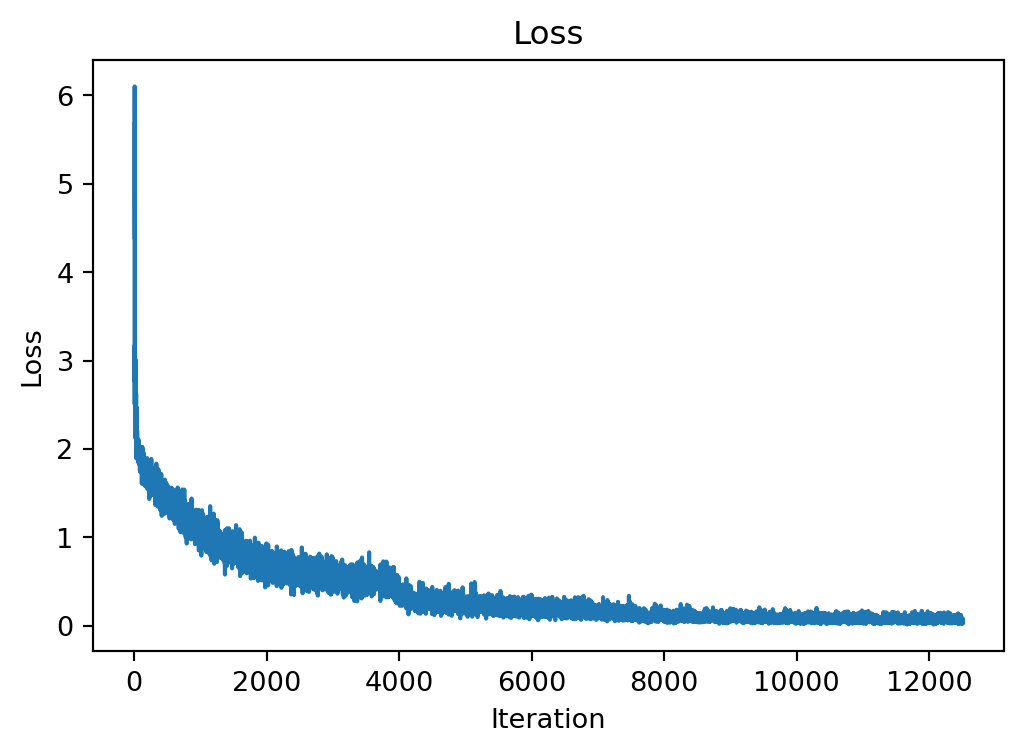

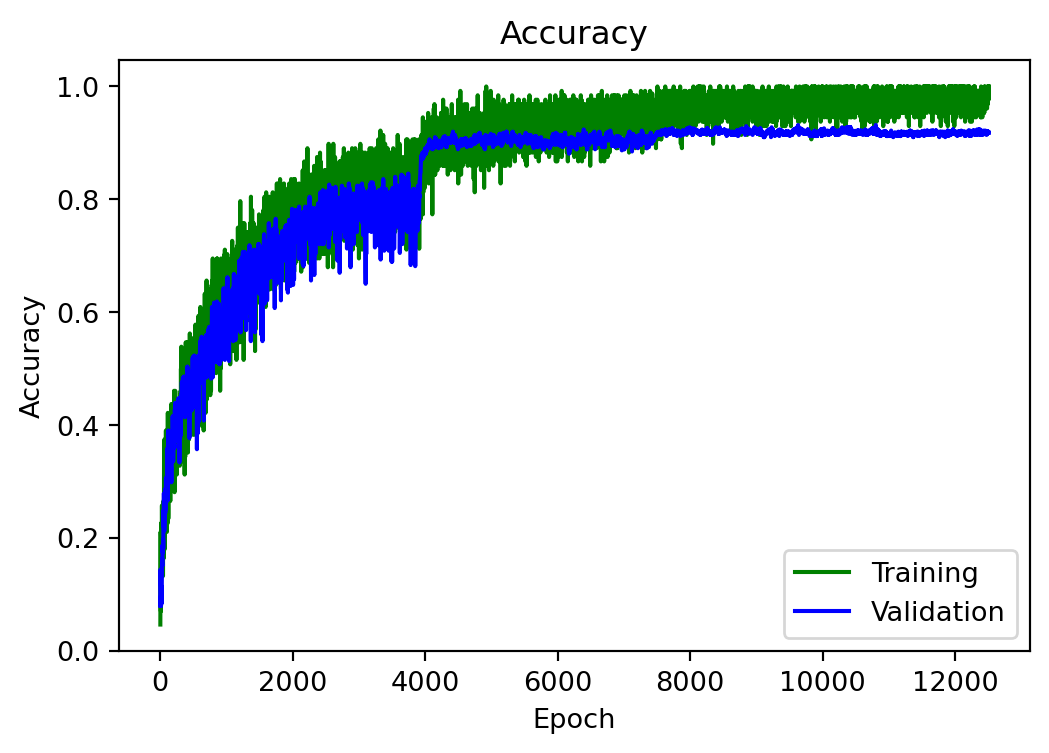

In [8]:
draw_loss(loss_list)
draw_acc(train_err, val_err)

# loss_list = [i.item() for i in loss_list]
# ILV, EFR = get_ILV_and_EFR(loss_list, train_err, val_err)
# print(ILV)
# print(EFR)

torch.save(loss_list, './try-1/loss_list')
torch.save(train_err, './try-1/train_err')
torch.save(val_err, './try-1/val_err')
torch.save(net.state_dict(), './try-1/param.pth')